In [1]:
import glob
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['font.size'] = 12  # Adjust base font size as needed
plt.rcParams['axes.labelsize'] = 12  # For x and y labels
plt.rcParams['axes.titlesize'] = 12  # For subplot titles
plt.rcParams['xtick.labelsize'] = 12  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # For y-axis tick labels

In [2]:
in_dir = Path('/mnt/d/UniHeidelberg/Kurse/Masterarbeit/results')

extension = {
    'ext4': (1, 3),
    'ext3': (4, 6),
    'ext2': (7, 9),
    'ext1': (10, 12),
    'baseline': (13, 15)
}

cmap_diverging = 'BrBG'
colors = plt.get_cmap(cmap_diverging)(np.linspace(0.5, 1.0, plt.get_cmap(cmap_diverging).N // 2))
cmap_sequential = LinearSegmentedColormap.from_list('my_sequential', colors)

## RAM Regression

In [3]:
data_dir = in_dir / 'performance' / 'hardware'

In [4]:
df_overview = pd.read_excel(in_dir / 'overview.xlsx')
df = pd.read_csv(data_dir / 'ram.csv')

merge = df.merge(df_overview, left_index=True, right_index=True, how='outer')

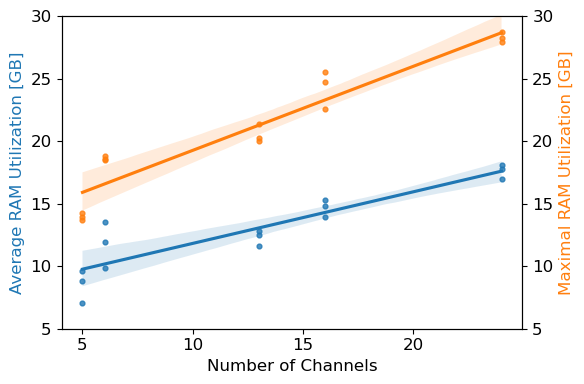

In [20]:
fig, ax1 = plt.subplots(figsize=(6, 4))

color = 'tab:blue'
sns.regplot(data=merge, x='num_channels', y='average', ax=ax1, color=color, scatter_kws={'s': 12}, line_kws={"color": color})
ax1.set_ylabel('Average RAM Utilization [GB]', color=color)
ax1.set_ylim(5, 30)

ax2 = ax1.twinx()
color = 'tab:orange'
sns.regplot(data=merge, x='num_channels', y='max', ax=ax2, color=color, scatter_kws={'s': 12}, line_kws={"color": color})
ax2.set_ylabel('Maximal RAM Utilization [GB]', color=color)
ax2.set_ylim(5, 30)

ax1.set_xlabel('Number of Channels')
ax1.set_xticks([5, 10, 15, 20])

fig.tight_layout()
plt.show()

## VRAM Regression

In [21]:
data_dir = in_dir / 'performance' / 'hardware'

In [22]:
df_overview = pd.read_excel(in_dir / 'overview.xlsx')
df = pd.read_csv(data_dir / 'vram.csv')

merge = df.merge(df_overview, left_index=True, right_index=True, how='outer')

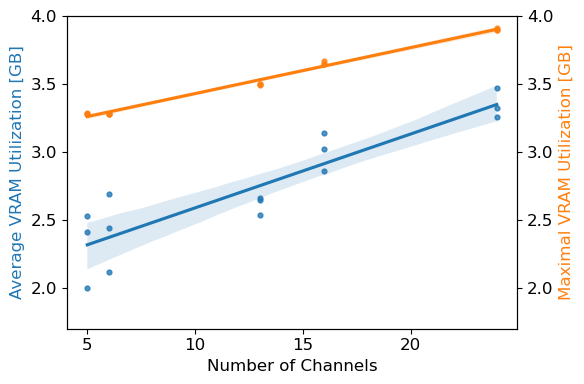

In [23]:
fig, ax1 = plt.subplots(figsize=(6, 4))

color = 'tab:blue'
sns.regplot(data=merge, x='num_channels', y='average', ax=ax1, color=color, scatter_kws={'s': 12}, line_kws={"color": color})
ax1.set_ylabel('Average VRAM Utilization [GB]', color=color)
ax1.set_ylim(1.7, 4)

ax2 = ax1.twinx()
color = 'tab:orange'
sns.regplot(data=merge, x='num_channels', y='max', ax=ax2, color=color, scatter_kws={'s': 12}, line_kws={"color": color})
ax2.set_ylabel('Maximal VRAM Utilization [GB]', color=color)
ax2.set_ylim(1.7, 4)

ax1.set_xlabel('Number of Channels')
ax1.set_xticks([5, 10, 15, 20])

fig.tight_layout()
plt.show()

## GPU Regression

In [ ]:
data_dir = in_dir / 'performance' / 'hardware'

In [27]:
df_overview = pd.read_excel(in_dir / 'overview.xlsx')
df = pd.read_csv(data_dir / 'gpu.csv')

merge = df.merge(df_overview, left_index=True, right_index=True, how='outer')

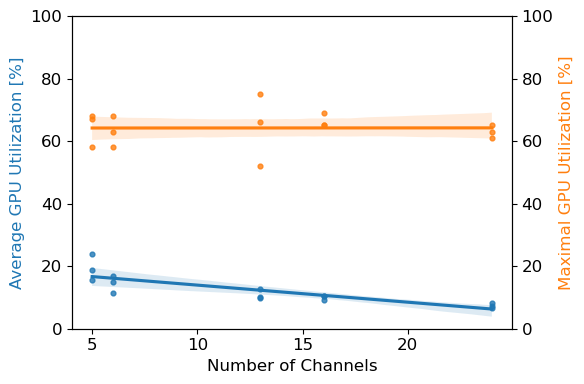

In [29]:
fig, ax1 = plt.subplots(figsize=(6, 4))

color = 'tab:blue'
sns.regplot(data=merge, x='num_channels', y='average', ax=ax1, color=color, scatter_kws={'s': 12}, line_kws={"color": color})
ax1.set_ylabel('Average GPU Utilization [%]', color=color)
ax1.set_ylim(0, 100)

ax2 = ax1.twinx()
color = 'tab:orange'
sns.regplot(data=merge, x='num_channels', y='max', ax=ax2, color=color, scatter_kws={'s': 12}, line_kws={"color": color})
ax2.set_ylabel('Maximal GPU Utilization [%]', color=color)
ax2.set_ylim(0, 100)

ax1.set_xlabel('Number of Channels')

fig.tight_layout()
plt.show()

## CPU Regression

In [ ]:
data_dir = in_dir / 'performance' / 'hardware'

In [30]:
df_overview = pd.read_excel(in_dir / 'overview.xlsx')
df = pd.read_csv(data_dir / 'cpu.csv')

merge = df.merge(df_overview, left_index=True, right_index=True, how='outer')

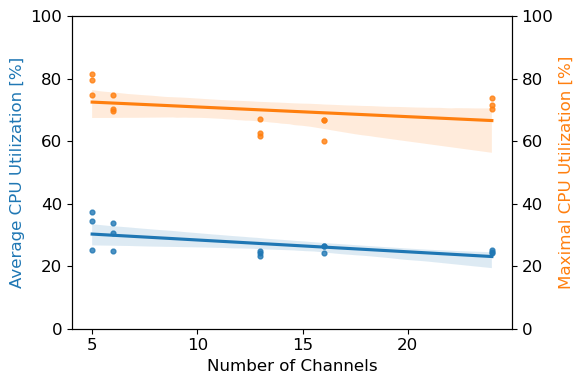

In [31]:
fig, ax1 = plt.subplots(figsize=(6, 4))

color = 'tab:blue'
sns.regplot(data=merge, x='num_channels', y='average', ax=ax1, color=color, scatter_kws={'s': 12}, line_kws={"color": color})
ax1.set_ylabel('Average CPU Utilization [%]', color=color)
ax1.set_ylim(0, 100)

ax2 = ax1.twinx()
color = 'tab:orange'
sns.regplot(data=merge, x='num_channels', y='max', ax=ax2, color=color, scatter_kws={'s': 12}, line_kws={"color": color})
ax2.set_ylabel('Maximal CPU Utilization [%]', color=color)
ax2.set_ylim(0, 100)

ax1.set_xlabel('Number of Channels')

fig.tight_layout()
plt.show()

## Performance vs. Complexity

In [33]:
data_dir = in_dir / 'performance'

In [34]:
df = pd.read_csv(data_dir / 'performance_avg.csv')
df

,group,num_channels,mean_train_acc,mean_val_acc,mean_test_acc,mean_train_iou,mean_val_iou,mean_test_iou
0,baseline,5,66.46,68.53,71.63,35.09,35.37,33.45
1,ext1,6,66.92,69.94,70.72,36.40,34.55,37.09
2,ext2,16,68.34,73.69,70.69,37.63,39.83,38.05
3,ext3,13,65.86,69.77,67.80,34.82,36.55,32.03
4,ext4,24,68.36,75.54,69.61,38.19,40.44,37.92


In [36]:
df.columns

Index(['group', 'num_channels', 'mean_train_acc', 'mean_val_acc',
       'mean_test_acc', 'mean_train_iou', 'mean_val_iou', 'mean_test_iou'],
      dtype='object')

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 4))

color = 'tab:blue'
sns.regplot(data=merge, x='num_channels', y='average', ax=ax1, color=color, scatter_kws={'s': 12}, line_kws={"color": color})
ax1.set_ylabel('Average CPU Utilization [%]', color=color)
ax1.set_ylim(0, 100)

ax2 = ax1.twinx()
color = 'tab:orange'
sns.regplot(data=merge, x='num_channels', y='max', ax=ax2, color=color, scatter_kws={'s': 12}, line_kws={"color": color})
ax2.set_ylabel('Maximal CPU Utilization [%]', color=color)
ax2.set_ylim(0, 100)

ax1.set_xlabel('Number of Channels')

fig.tight_layout()
plt.show()

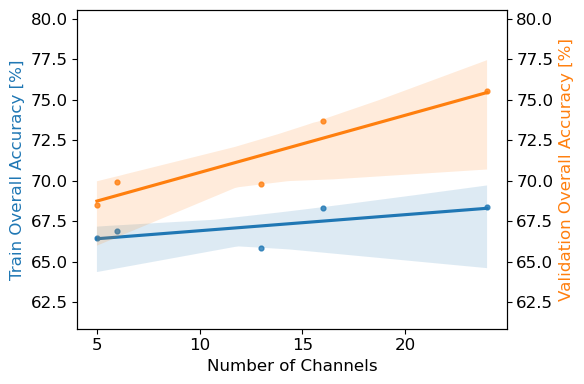

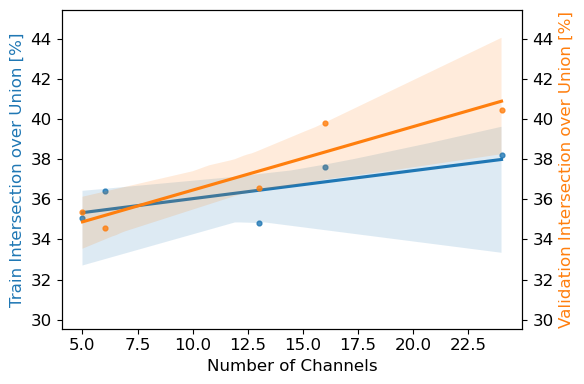

In [50]:
for metric in ['acc', 'iou']:
    fig, ax1 = plt.subplots(figsize=(6, 4))

    if metric == 'acc':
        metric_name = 'Overall Accuracy'
    elif metric == 'iou':
        metric_name = 'Intersection over Union'

    df_ex = df[['num_channels', f'mean_train_{metric}', f'mean_val_{metric}']]

    vmin = df_ex[[f'mean_train_{metric}', f'mean_val_{metric}']].min().min()
    vmax = df_ex[[f'mean_train_{metric}', f'mean_val_{metric}']].max().max()

    color = 'tab:blue'
    sns.regplot(data=df_ex, x='num_channels', y=f'mean_train_{metric}', ax=ax1, color=color, scatter_kws={'s': 12}, line_kws={"color": color})
    ax1.set_ylabel(f'Train {metric_name} [%]', color=color)
    ax1.set_ylim(vmin -5, vmax + 5)

    ax2 = ax1.twinx()
    color = 'tab:orange'
    sns.regplot(data=df_ex, x='num_channels', y=f'mean_val_{metric}', ax=ax2, color=color, scatter_kws={'s': 12}, line_kws={"color": color})
    ax2.set_ylabel(f'Validation {metric_name} [%]', color=color)
    ax2.set_ylim(vmin -5, vmax + 5)

    ax1.set_xlabel('Number of Channels')

    fig.tight_layout()
    plt.show()

## Training Loss vs. Validation Loss

In [75]:
data_dir = in_dir / 'performance' / 'loss'
out_dir = Path('/mnt/d/UniHeidelberg/Kurse/Masterarbeit/writing/Figures/results/extensions/loss')

column_names = ['step', 'time', 'value']

In [80]:
results = []

for i in range(1,16):
    df_train = pd.read_csv(data_dir / 'train' / f'NETINT-{i}__train_epoch_loss.csv', header=None, names=column_names)
    df_val = pd.read_csv(data_dir / 'val' / f'NETINT-{i}__val_epoch_loss.csv', header=None, names=column_names)

    merge = df_train.merge(df_val, on='step', suffixes=('_train', '_val'), how='outer')
    merge.drop(columns=['time_train', 'time_val'], inplace=True)

    fig, ax = plt.subplots(figsize=(6, 4))

    sns.lineplot(data=merge, x='step', y='value_train', ax=ax, color='tab:blue')
    sns.lineplot(data=merge, x='step', y='value_val', ax=ax, color='tab:orange')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Step')
    ax.set_ylim(0.7, 1.6)

    plt.tight_layout()
    plt.savefig(out_dir / f'{i}_loss.png')
    plt.close()

## Accuracy

In [14]:
data_dir = in_dir / 'performance' / 'acc'
out_dir = Path('/mnt/d/UniHeidelberg/Kurse/Masterarbeit/writing/Figures/results/extensions/acc')

column_names = ['step', 'time', 'value']

In [15]:
results = []

for i in range(1,16):
    df_train = pd.read_csv(data_dir / 'train' / f'NETINT-{i}__train_epoch_acc.csv', header=None, names=column_names)
    df_val = pd.read_csv(data_dir / 'val' / f'NETINT-{i}__val_epoch_acc.csv', header=None, names=column_names)

    merge = df_train.merge(df_val, on='step', suffixes=('_train', '_val'), how='outer')
    merge.drop(columns=['time_train', 'time_val'], inplace=True)

    merge['value_train'] = merge['value_train'] * 100
    merge['value_val'] = merge['value_val'] * 100

    fig, ax = plt.subplots(figsize=(6, 4))

    sns.lineplot(data=merge, x='step', y='value_train', ax=ax, color='tab:blue')
    sns.lineplot(data=merge, x='step', y='value_val', ax=ax, color='tab:orange')
    ax.set_ylabel('Overall Accuracy [%]')
    ax.set_xlabel('Step')
    ax.set_ylim(25, 80)

    plt.tight_layout()
    plt.savefig(out_dir / f'{i}_acc.png')
    plt.close()

## Intersection over Union

In [6]:
data_dir = in_dir / 'performance' / 'iou'
out_dir = Path('/mnt/d/UniHeidelberg/Kurse/Masterarbeit/writing/Figures/results/extensions/iou')

column_names = ['step', 'time', 'value']

In [13]:
results = []

for i in range(1,16):
    df_train = pd.read_csv(data_dir / 'train' / f'NETINT-{i}__train_epoch_iou.csv', header=None, names=column_names)
    df_val = pd.read_csv(data_dir / 'val' / f'NETINT-{i}__val_epoch_iou.csv', header=None, names=column_names)

    merge = df_train.merge(df_val, on='step', suffixes=('_train', '_val'), how='outer')
    merge.drop(columns=['time_train', 'time_val'], inplace=True)

    merge['value_train'] = merge['value_train'] * 100
    merge['value_val'] = merge['value_val'] * 100

    fig, ax = plt.subplots(figsize=(6, 4))

    sns.lineplot(data=merge, x='step', y='value_train', ax=ax, color='tab:blue')
    sns.lineplot(data=merge, x='step', y='value_val', ax=ax, color='tab:orange')
    ax.set_ylabel('Intersection over Union [%]')
    ax.set_xlabel('Step')
    ax.set_ylim(10, 50)

    plt.tight_layout()
    plt.savefig(out_dir / f'{i}_iou.png')
    plt.close()